<a href="https://colab.research.google.com/github/tayfununal/Normalizing-Flows/blob/main/eulerverlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(39)

def symplectic_euler(h=0.01):

    t = np.arange(0, 2*np.pi, h)

    q = np.zeros(t.shape[0] )
    p = np.zeros(t.shape[0] )

    q[0] = 1
    p[0] = 0
    
    for i in range(0, t.shape[0]-1):
      q[i + 1] = (1-h**2) * q[i] + h * p[i]
      p[i + 1] = p[i] - h * q[i]

    return q, p, t

p , q, t = symplectic_euler()
print("q değerleri:\n", q ,"\np değerleri:\n", p, "\nt değerleri:\n", t)

q değerleri:
 [ 0.         -0.01       -0.019999   -0.029996   -0.03999    -0.04998
 -0.05996501 -0.06994401 -0.07991603 -0.08988005 -0.09983508 -0.10978013
 -0.1197142  -0.1296363  -0.13954544 -0.14944062 -0.15932086 -0.16918516
 -0.17903255 -0.18886203 -0.19867263 -0.20846336 -0.21823325 -0.22798131
 -0.23770657 -0.24740806 -0.25708481 -0.26673586 -0.27636022 -0.28595696
 -0.29552509 -0.30506368 -0.31457176 -0.32404838 -0.3334926  -0.34290346
 -0.35228004 -0.36162139 -0.37092658 -0.38019467 -0.38942475 -0.39861588
 -0.40776715 -0.41687764 -0.42594645 -0.43497266 -0.44395537 -0.45289369
 -0.46178672 -0.47063357 -0.47943336 -0.4881852  -0.49688823 -0.50554157
 -0.51414435 -0.52269572 -0.53119481 -0.53964079 -0.54803281 -0.55637002
 -0.56465159 -0.5728767  -0.58104453 -0.58915424 -0.59720505 -0.60519613
 -0.61312669 -0.62099594 -0.62880309 -0.63654736 -0.64422797 -0.65184416
 -0.65939517 -0.66688024 -0.67429862 -0.68164957 -0.68893235 -0.69614624
 -0.70329052 -0.71036447 -0.71736738 -0.

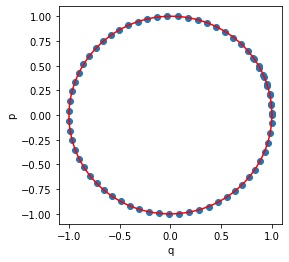

In [256]:
plt.figure(figsize = (4, 4))
plt.plot(p[:, ], q[:,], c = "red")
plt.xlabel('q')
plt.ylabel('p')

t_true=np.arange(0,7,0.1)
x=np.cos(t_true)
y=np.sin(t_true)
plt.scatter(x,y)
plt.show()

In [257]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

In [258]:
inp = Input(shape=(1,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model = Model(inputs=inp, outputs=out)

In [259]:
model.summary()

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_114 (Dense)           (None, 64)                128       
                                                                 
 dense_115 (Dense)           (None, 64)                4160      
                                                                 
 dense_116 (Dense)           (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [260]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt , loss="mse")
model.fit(t, np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1), epochs=200, batch_size=16)

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 0.4413
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1148
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 13/200
40/40 [=================

In [249]:
def z(t, z_0):
  y = z_0 + t.reshape(-1,1) * model(t).numpy()
  return y

In [198]:
sonuc = z(t=t, z_0 = np.array([1, 0]))

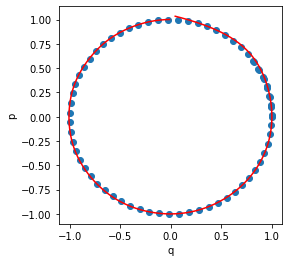

In [261]:
plt.figure(figsize = (4, 4))
plt.plot(model(t).numpy()[:,0], model(t).numpy()[:,1], c = "red")
plt.xlabel('q')
plt.ylabel('p')

t_true=np.arange(0,7,0.1)
x=np.cos(t_true)
y=np.sin(t_true)
plt.scatter(x,y)
plt.show()

In [262]:
inp = Input(shape=(2,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model2 = Model(inputs=inp, outputs=out)

In [263]:
def H(z):
  return tf.reduce_sum((z**2)/2,axis=1)


def custom_loss(y_true, y_pred):
  return (1/16) *(H(y_true) - H(y_pred))**2

In [264]:
hamiltonian_0 = np.array([0.5 for i in range(model(t).numpy().shape[0])]).reshape(-1,1)
hamiltonian_0.shape

(629, 1)

In [265]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer=opt, loss=custom_loss)
model2.fit(x = model(t).numpy(), y=np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1), epochs=200, batch_size=16)

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4725e-04
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 1.0349e-05
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9089e-06
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 2.1959e-06
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9342e-06
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0864e-06
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 5.3302e-06
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 1.9582e-06
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 3.6160e-06
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7025e-06
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 2.68

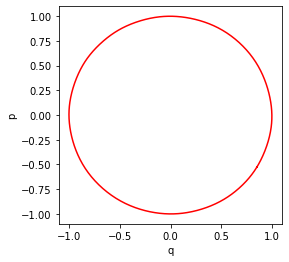

In [268]:
plt.figure(figsize = (4, 4))
plt.plot(model2(np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1))[:,0], model2(np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1))[:,1], c = "red")
plt.xlabel('q')
plt.ylabel('p')
"""
t_true=np.arange(0,7,0.1)
x=np.cos(t_true)
y=np.sin(t_true)
plt.scatter(x,y)"""
plt.show()

In [ ]:
#verlet
import math
import numpy as np

def verlet(h = 0.5, num_steps = 10):
  
  pv = np.zeros(num_steps + 1)
  qv = np.zeros(num_steps + 1)

  pv[0] = 0
  qv[0] = 1
  
  for i in range(0 ,num_steps):
    ara_p = pv[i] - h/2 * qv[i]

    qv[i+1] = qv[i] + h * (pv[i] - h/2 * qv[i])

    pv[i+1] = ara_p - h/2 * (qv[i] + h * (pv[i] - h/2 * qv[i]))

  return pv,qv

pv, qv = verlet()
print("p", pv ,"\nq", qv)

p [ 0.         -0.46875    -0.8203125  -0.96679688 -0.87158203 -0.55847168
 -0.10574341  0.37342072  0.75922966  0.95523119  0.91242492] 
q [ 1.          0.875       0.53125     0.0546875  -0.43554688 -0.81689453
 -0.99401855 -0.92263794 -0.62059784 -0.16340828  0.33463335]


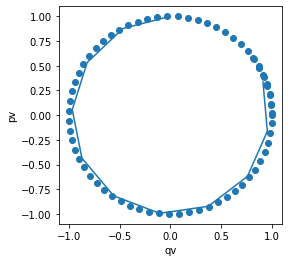

In [ ]:
plt.figure(figsize = (4, 4))
plt.plot(pv[:, ], qv[:,])
plt.xlabel('qv')
plt.ylabel('pv')
t=np.arange(0,7,0.1)
x=np.cos(t)
y=np.sin(t)
plt.scatter(x,y)
plt.show()
      

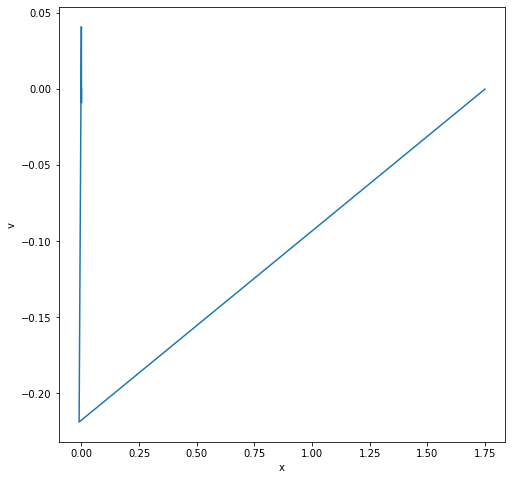

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
h=0.5
  
t = np.linspace(0,100,N)
dt = t[1]-t[0]


pv1 = np.zeros(N)
qv1 = np.zeros(N)
pv1[0] = 2 + 0.25 * math.cos(math.pi)
qv1[0] = 2 * math.sin(math.pi)

for i in range(N-1):
    
    pv1[(i+1)//2] = pv1[i] - h*qv1[i]/2
    qv1[i+1] = qv1[i] + h*(pv1[i] - h*qv1[i]/2)
    qv1[i+1] = pv1[i+1]/2 - h/2*(qv1[i] + h*(pv1[i] - h/2*qv1[i]))

plt.figure(figsize = (8, 8))
plt.plot(pv1[:, ], qv1[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()


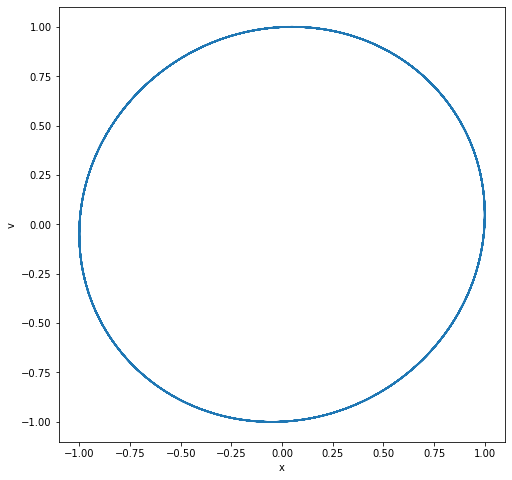

 [ 1.          0.98997997  0.97004031  0.94038082  0.90129868  0.85318551
  0.79652339  0.73188008  0.65990331  0.58131429  0.49690048  0.40750772
  0.31403171  0.2174091   0.11860804  0.01861853 -0.08155754 -0.1809164
 -0.27846248 -0.37321835 -0.46423456 -0.55059913 -0.63144668 -0.70596711
 -0.77341374 -0.83311073 -0.88445993 -0.92694681 -0.96014566 -0.98372382
 -0.99744504 -1.00117183 -0.99486685 -0.97859327 -0.95251416 -0.91689083
 -0.87208022 -0.81853134 -0.75678076 -0.68744721 -0.61122542 -0.52887913
 -0.44123345 -0.3491666  -0.2536011  -0.1554945  -0.05582984  0.04439423
  0.14417347  0.24250809  0.33841277  0.43092655  0.51912243  0.60211668
  0.67907771  0.74923436  0.81188366  0.86639786  0.91223073  0.94892301
  0.97610706  0.99351049  1.00095892  0.9983777   0.98579271  0.96333005
  0.93121479  0.88976874  0.83940717  0.78063472  0.71404028  0.64029114
  0.56012626  0.4743489   0.38381855  0.28944233  0.19216589  0.09296394
 -0.00716952 -0.10723113 -0.20621829 -0.30313913 -0

In [ ]:
#leapfrog
import numpy as np
import matplotlib.pyplot as plt
    

N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]


x = np.zeros(N)
v = np.zeros(N)
x[0] = x0
v[0] = 0
for i in range(N-1):
    
  v[i+1] = v[i] + (-w**2) * x[i] * dt
  x[i+1] = v[i+1] * dt + x[i]


plt.figure(figsize = (8, 8))
plt.plot(x[:, ], v[:,])
plt.xlabel('x')
plt.ylabel('v')
plt.show()
print("", x ,"", v)

In [ ]:
import numpy as np
k = 1
N = 1000
x0 = 1
w=1
    
t = np.linspace(0,100,N)
dt = t[1]-t[0]

x1 = np.zeros(N)
v1 = np.zeros(N)
x1[0] = x0
v1[0] = 0
def leapfrog() :
  for i in range (N-1) :
    v1[i+1] = v1[i] + (-w**2) * x1[i] * dt
    x1[i+1] = v1[i+1] + dt * x1[i]

    return v1,x1

leapfrog()




(array([ 0.       , -0.1001001,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0. 